# Beirut harbour blast explosion analysed with Coherence Change Detection

*******************************************************************************************

## Disclaimer
Disclaimer: This product has been derived automatically without validation data. All geographic information has limitations due to the scale, resolution, date and interpretation of the original source materials. No liability concerning the content or the use thereof is assumed by the producer.

Original script created by: Geospatial Operations Support Team, The World Bank, March 2021.

Modified script created by: ESA Φ-lab, October 2025
*******************************************************************************************

#Beirut Coherence Change Detection
This notebook serves to demonstrate the use case of the usage of the Coherence Change Detection for quick analysis of the area devastated after the blast in the Port of Beirut, occurred in past 4th August 2020 at 5:00 p. m. CEST.

The August 2020 explosion in Lebanon resulted in casualties, injuries, and a great number of internally displaced persons. The blast occurred during an economically and politically complex time in the country.

On August 4, 2020, a cache of approximately 2750 metric tons of ammonium nitrate precariously stored in the port of Beirut, Lebanon ignited and set off a massive high order blast that destroyed large parts of the ancient city. The strength of the blast was is considered one of the largest explosions recorded in modern history. While the motives behind storing a sizeable accumulation of highly explosive materials for years in a densely populated urban area will be a matter for future investigations, in this editorial, we elaborate on the health outcomes and health systems effects of the blast that resulted in over 200 casualties, 7000 injured and over 300,000 internally displaced persons. Source: https://bmchealthservres.biomedcentral.com/articles/10.1186/s12913-020-05906-y

In [ ]:
#@title Pictures pre/post event
from IPython.core.display import Image, display
print('1. Port Beirut picture on 2020/05/31, courtesy of Planet')
display(Image('https://storage.googleapis.com/planet-gallery-uploader/posts/ammonium-nitrate-explosion/port_beirut_lebanon_s112_20200531T081734Z_rgb_3840_16by9_geo/port_beirut_lebanon_s112_20200531T081734Z_rgb_3840_16by9_geo-2-full.jpg', width=500, unconfined=False))
print('############################################################################################')
print('2. Port Beirut after explosion taken on 2020/08/05, courtesy of Planet')
display(Image('https://storage.googleapis.com/planet-gallery-uploader/posts/ammonium-nitrate-explosion/port_beirut_lebanon_s3_20200805T083844Z_rgb_3840_16by9_geo/port_beirut_lebanon_s3_20200805T083844Z_rgb_3840_16by9_geo-1-full.jpg', width=500, unconfined=False))

# Aerial photo
# Displaying picture after the blast
from IPython.core.display import Image, display
print('############################################################################################')
print('3. Aerial Port Beirut after explosion')
display(Image('https://media.springernature.com/lw685/springer-static/image/art%3A10.1186%2Fs12913-020-05906-y/MediaObjects/12913_2020_5906_Fig1_HTML.png', width=1900, unconfined=True))

# Sentinel-1 burst download using Phidown package
## Phidown has been developed by Roberto del Prete https://github.com/ESA-PhiLab/phidown

In [ ]:
!pip install phidown

In [ ]:
from pathlib import Path
from phidown.downloader import download_burst_on_demand, get_token

In [ ]:
#@title My credentials for data download

from getpass import getpass
user = input()
mypass=getpass()
access_token = get_token(username=user,
                        password=mypass)

In [ ]:
#https://www.wktmap.com
footprint=Beirut_wkt="""POLYGON ((35.461807 33.879822, 35.565491 33.879822, 35.565491 33.918292, 35.461807 33.918292, 35.461807 33.879822))"""
footprint=Beirut_wkt="""POLYGON ((-5.813508 29.776894, -5.648005 29.776894, -5.648005 29.846898, -5.813508 29.846898, -5.813508 29.776894))"""

In [ ]:
#@title importing phidown required libraries

"""
Import Required Libraries

Import the CopernicusDataSearcher class from phidown for burst searching.

Note: If you get an error about 'burst_mode' parameter not found, please:
1. Restart the kernel (Kernel > Restart Kernel)
2. Re-run this cell
This ensures the latest phidown version with burst mode support is loaded.
"""
from phidown.search import CopernicusDataSearcher
import pandas as pd

# Set pandas display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

# Verify burst mode is available
print('Checking if burst mode is available...')
import inspect
sig = inspect.signature(CopernicusDataSearcher.query_by_filter)
if 'burst_mode' in sig.parameters:
    print('✓ Burst mode is available!')
else:
    print('✗ Burst mode not found. Please restart the kernel and re-run this cell.')

Checking if burst mode is available...
✓ Burst mode is available!


In [ ]:
#@title Phidown search

"""
Burst Search with AOI

Search for bursts that intersect with a specific geographic area.
The AOI is defined as a WKT (Well-Known Text) polygon.
"""
# Define an area of interest (example: region in central Europe)
aoi_wkt = Beirut_wkt

# Initialize the CopernicusDataSearcher
searcher = CopernicusDataSearcher()

# Configure search with AOI and temporal filter
searcher.query_by_filter(
    burst_mode=True,
    aoi_wkt=aoi_wkt,
    start_date='2024-08-01T00:00:00',
    end_date='2024-08-28T00:00:00',
    polarisation_channels='VV',
    orbit_direction='ASCENDING',
    relative_orbit_number=45,
    operational_mode='IW',

    top=1000,
    count=True
)

print(f'Query URL: {searcher._build_query()}\n')

# Execute and display results
df = searcher.execute_query()
print(f'Found {len(df)} bursts in the specified area')
searcher.display_results(top_n=10)


Query URL: https://catalogue.dataspace.copernicus.eu/odata/v1/Bursts?$filter=OrbitDirection eq 'ASCENDING' and OData.CSC.Intersects(area=geography'SRID=4326;POLYGON((-5.813508 29.776894, -5.648005 29.776894, -5.648005 29.846898, -5.813508 29.846898, -5.813508 29.776894))') and ContentDate/Start ge 2024-08-01T00:00:00 and ContentDate/Start le 2024-08-28T00:00:00 and RelativeOrbitNumber eq 45 and OperationalMode eq 'IW' and PolarisationChannels eq 'VV'&$orderby=ContentDate/Start desc&$top=1000&$count=true

Found 0 bursts in the specified area
The DataFrame is empty.


In [ ]:
#@title Analysing search results

# Execute query
df = searcher.execute_query()

print(f'=== Burst Search Results Analysis ===\n')
print(f'Total bursts found: {len(df)}')
print(f'Total available: {searcher.num_results}\n')

# Analyze burst distribution
if len(df) > 0:
    print(f'=== Burst Characteristics ===')

    # Check available columns
    if 'SwathIdentifier' in df.columns:
        print(f'\nSwath Distribution:')
        print(df['SwathIdentifier'].value_counts())

    if 'PolarisationChannels' in df.columns:
        print(f'\nPolarization Channels:')
        print(df['PolarisationChannels'].value_counts())

    if 'ParentProductName' in df.columns:
        print(f'\nNumber of unique parent products: {df["ParentProductName"].nunique()}')

    if 'BurstId' in df.columns:
        print(f'\nNumber of unique burst IDs: {df["BurstId"].nunique()}')
        print(f'Burst ID range: {df["BurstId"].min()} - {df["BurstId"].max()}')

    print(f'\n=== Sample Results ===')
    searcher.display_results(top_n=5)

=== Burst Search Results Analysis ===

Total bursts found: 6
Total available: 6

=== Burst Characteristics ===

Swath Distribution:
SwathIdentifier
IW1    6
Name: count, dtype: int64

Polarization Channels:
PolarisationChannels
VV    6
Name: count, dtype: int64

Number of unique parent products: 3

Number of unique burst IDs: 2
Burst ID range: 200630 - 200631

=== Sample Results ===


In [ ]:
#@title Selecting burst to search from the list above

burst_id=200631

"""
Burst Search with AOI

Search for bursts that intersect with a specific geographic area.
The AOI is defined as a WKT (Well-Known Text) polygon.
"""
# Define an area of interest (example: region in central Europe)
aoi_wkt = Beirut_wkt

# Initialize the CopernicusDataSearcher
searcher = CopernicusDataSearcher()

# Configure search with AOI and temporal filter
searcher.query_by_filter(
    burst_mode=True,
    burst_id=200631,
    aoi_wkt=aoi_wkt,
    start_date='2020-07-23T00:00:00',
    end_date='2020-08-06T00:00:00',
    polarisation_channels='VV',
    orbit_direction='DESCENDING',
    relative_orbit_number=94,
    operational_mode='IW',

    top=1000,
    count=True
)

print(f'Query URL: {searcher._build_query()}\n')

# Execute and display results
df = searcher.execute_query()
print(f'Found {len(df)} bursts in the specified area')
searcher.display_results(top_n=10)

Query URL: https://catalogue.dataspace.copernicus.eu/odata/v1/Bursts?$filter=OrbitDirection eq 'DESCENDING' and OData.CSC.Intersects(area=geography'SRID=4326;POLYGON((35.461807 33.879822, 35.565491 33.879822, 35.565491 33.918292, 35.461807 33.918292, 35.461807 33.879822))') and ContentDate/Start ge 2020-07-23T00:00:00 and ContentDate/Start le 2020-08-06T00:00:00 and BurstId eq 200631 and RelativeOrbitNumber eq 94 and OperationalMode eq 'IW' and PolarisationChannels eq 'VV'&$orderby=ContentDate/Start desc&$top=1000&$count=true

Found 3 bursts in the specified area


,Id,BurstId,SwathIdentifier,ParentProductName,PolarisationChannels,OrbitDirection,ContentDate
0,9dac2201-6b9c-4561-b9be-f59d2e59ac83,200631,IW1,S1A_IW_SLC__1SDV_20200805T034334_20200805T0344...,VV,DESCENDING,"{'Start': '2020-08-05T03:43:49.682636Z', 'End'..."
1,1f669a6d-5ca4-4666-9a5c-e0b428513841,200631,IW1,S1B_IW_SLC__1SDV_20200730T034254_20200730T0343...,VV,DESCENDING,"{'Start': '2020-07-30T03:43:07.584657Z', 'End'..."
2,bb88477d-2a2a-4346-bd91-7b8993353bb4,200631,IW1,S1A_IW_SLC__1SDV_20200724T034334_20200724T0344...,VV,DESCENDING,"{'Start': '2020-07-24T03:43:49.106831Z', 'End'..."


In [ ]:
#@title Downloading burst from search results

for burst_id in df['Id'].to_list():
  download_burst_on_demand(burst_id=burst_id, token=access_token, output_dir=Path('./'))

In [ ]:
#@title Defining parameters for satellite data processing
# Sentinel-1 SLC images
import glob
import os

reference=sorted(glob.glob(os.path.join(os.getcwd(),'*20200730*zip')))[0]
secondaries=images=sorted(glob.glob(os.path.join(os.getcwd(),'S1A*zip')))
print('Reference image selected as the last prior the event')
print(reference)
print('Other images selected as secondaries')
print(secondaries)

# Subswath
print('Select one subswath [IW1,IW2,IW3] (default IW1)')
IWs=input()
if IWs=="":
  IWs='IW1'
print('Selected subswath:'+IWs)
# polarisation
print('Select polarisation [VV,VH] (default VV)')
polarisation=input()
if polarisation=='':
  polarisation='VV'
print('Selected polarisation:'+polarisation)

print(footprint)

# Defining graphs to be employed (Graph xml includes all steps to run using SNAP in command line)
#graphxml='/content/drive/MyDrive/WB_Coherence/WB_coherence.xml'
#graphxml='/content/drive/MyDrive/WB_Coherence/Beirut/WB_Coh_TC_Subset2.xml'
outputifgfolder=os.getcwd()
graphxml=os.path.join(os.getcwd(),'WB_Coh_TC_Subset2.xml')
graph2run=os.path.join(os.getcwd(),'graph2run.xml')

Reference image selected as the last prior the event
/content/S1B_SLC_20200730T034307_200631_IW1_VV_176433.zip
Other images selected as secondaries
['/content/S1A_SLC_20200724T034349_200631_IW1_VV_255133.zip', '/content/S1A_SLC_20200805T034349_200631_IW1_VV_256505.zip']
Select one subswath [IW1,IW2,IW3] (default IW1)

Selected subswath:IW1
Select polarisation [VV,VH] (default VV)

Selected polarisation:VV
POLYGON ((35.461807 33.879822, 35.565491 33.879822, 35.565491 33.918292, 35.461807 33.918292, 35.461807 33.879822))


In [ ]:
#@title Defining SNAP processing graph to execute
%%writefile ./WB_Coh_TC_Subset2.xml
<graph id="Graph">
  <version>1.0</version>
  <node id="Read">
    <operator>Read</operator>
    <sources/>
    <parameters class="com.bc.ceres.binding.dom.XppDomElement">
      <file>REFERENCE</file>
    </parameters>
  </node>
  <node id="Read(2)">
    <operator>Read</operator>
    <sources/>
    <parameters class="com.bc.ceres.binding.dom.XppDomElement">
      <file>SECONDARY</file>
    </parameters>
  </node>
  <node id="Apply-Orbit-File">
    <operator>Apply-Orbit-File</operator>
    <sources>
      <sourceProduct refid="Read"/>
    </sources>
    <parameters class="com.bc.ceres.binding.dom.XppDomElement">
      <orbitType>Sentinel Precise (Auto Download)</orbitType>
      <polyDegree>3</polyDegree>
      <continueOnFail>false</continueOnFail>
    </parameters>
  </node>
  <node id="Apply-Orbit-File(2)">
    <operator>Apply-Orbit-File</operator>
    <sources>
      <sourceProduct refid="Read(2)"/>
    </sources>
    <parameters class="com.bc.ceres.binding.dom.XppDomElement">
      <orbitType>Sentinel Precise (Auto Download)</orbitType>
      <polyDegree>3</polyDegree>
      <continueOnFail>false</continueOnFail>
    </parameters>
  </node>
  <node id="Back-Geocoding">
    <operator>Back-Geocoding</operator>
    <sources>
      <sourceProduct refid="Apply-Orbit-File"/>
      <sourceProduct.1 refid="Apply-Orbit-File(2)"/>
    </sources>
    <parameters class="com.bc.ceres.binding.dom.XppDomElement">
      <demName>SRTM 1Sec HGT</demName>
      <demResamplingMethod>BILINEAR_INTERPOLATION</demResamplingMethod>
      <externalDEMFile/>
      <externalDEMNoDataValue>0.0</externalDEMNoDataValue>
      <resamplingType>BISINC_21_POINT_INTERPOLATION</resamplingType>
      <maskOutAreaWithoutElevation>true</maskOutAreaWithoutElevation>
      <outputRangeAzimuthOffset>false</outputRangeAzimuthOffset>
      <outputDerampDemodPhase>false</outputDerampDemodPhase>
      <disableReramp>false</disableReramp>
    </parameters>
  </node>
  <node id="TOPSAR-Deburst">
    <operator>TOPSAR-Deburst</operator>
    <sources>
      <sourceProduct refid="Coherence"/>
    </sources>
    <parameters class="com.bc.ceres.binding.dom.XppDomElement">
      <selectedPolarisations>POLARISATION</selectedPolarisations>
    </parameters>
  </node>
  <node id="Coherence">
    <operator>Coherence</operator>
    <sources>
      <sourceProduct refid="Back-Geocoding"/>
    </sources>
    <parameters class="com.bc.ceres.binding.dom.XppDomElement">
      <cohWinAz>3</cohWinAz>
      <cohWinRg>10</cohWinRg>
      <subtractFlatEarthPhase>true</subtractFlatEarthPhase>
      <srpPolynomialDegree>5</srpPolynomialDegree>
      <srpNumberPoints>501</srpNumberPoints>
      <orbitDegree>3</orbitDegree>
      <squarePixel>true</squarePixel>
      <subtractTopographicPhase>true</subtractTopographicPhase>
      <demName>SRTM 1Sec HGT</demName>
      <externalDEMFile/>
      <externalDEMNoDataValue>0.0</externalDEMNoDataValue>
      <externalDEMApplyEGM>true</externalDEMApplyEGM>
      <tileExtensionPercent>100</tileExtensionPercent>
   <!--   <singleMaster>true</singleMaster> -->
    </parameters>
  </node>
  <node id="Terrain-Correction">
    <operator>Terrain-Correction</operator>
    <sources>
      <sourceProduct refid="TOPSAR-Deburst"/>
    </sources>
    <parameters class="com.bc.ceres.binding.dom.XppDomElement">
      <sourceBands/>
      <demName>SRTM 1Sec HGT</demName>
      <externalDEMFile/>
      <externalDEMNoDataValue>0.0</externalDEMNoDataValue>
      <externalDEMApplyEGM>true</externalDEMApplyEGM>
      <demResamplingMethod>BILINEAR_INTERPOLATION</demResamplingMethod>
      <imgResamplingMethod>BILINEAR_INTERPOLATION</imgResamplingMethod>
      <pixelSpacingInMeter>20.0</pixelSpacingInMeter>
      <pixelSpacingInDegree>1.796630568239043E-4</pixelSpacingInDegree>
      <mapProjection>GEOGCS[&quot;WGS84(DD)&quot;, &#xd;
  DATUM[&quot;WGS84&quot;, &#xd;
    SPHEROID[&quot;WGS84&quot;, 6378137.0, 298.257223563]], &#xd;
  PRIMEM[&quot;Greenwich&quot;, 0.0], &#xd;
  UNIT[&quot;degree&quot;, 0.017453292519943295], &#xd;
  AXIS[&quot;Geodetic longitude&quot;, EAST], &#xd;
  AXIS[&quot;Geodetic latitude&quot;, NORTH]]</mapProjection>
      <alignToStandardGrid>false</alignToStandardGrid>
      <standardGridOriginX>0.0</standardGridOriginX>
      <standardGridOriginY>0.0</standardGridOriginY>
      <nodataValueAtSea>true</nodataValueAtSea>
      <saveDEM>false</saveDEM>
      <saveLatLon>false</saveLatLon>
      <saveIncidenceAngleFromEllipsoid>false</saveIncidenceAngleFromEllipsoid>
      <saveLocalIncidenceAngle>false</saveLocalIncidenceAngle>
      <saveProjectedLocalIncidenceAngle>false</saveProjectedLocalIncidenceAngle>
      <saveSelectedSourceBand>true</saveSelectedSourceBand>
      <outputComplex>false</outputComplex>
      <applyRadiometricNormalization>false</applyRadiometricNormalization>
      <saveSigmaNought>false</saveSigmaNought>
      <saveGammaNought>false</saveGammaNought>
      <saveBetaNought>false</saveBetaNought>
      <incidenceAngleForSigma0>Use projected local incidence angle from DEM</incidenceAngleForSigma0>
      <incidenceAngleForGamma0>Use projected local incidence angle from DEM</incidenceAngleForGamma0>
      <auxFile>Latest Auxiliary File</auxFile>
      <externalAuxFile/>
    </parameters>
  </node>
  <node id="Subset">
    <operator>Subset</operator>
    <sources>
      <sourceProduct refid="Terrain-Correction"/>
    </sources>
    <parameters class="com.bc.ceres.binding.dom.XppDomElement">
      <sourceBands/>
      <region>0,0,5485,1857</region>
  <!--    <referenceBand/> -->
      <geoRegion>POLYGON</geoRegion>
      <subSamplingX>1</subSamplingX>
      <subSamplingY>1</subSamplingY>
      <fullSwath>false</fullSwath>
      <tiePointGridNames/>
      <copyMetadata>true</copyMetadata>
    </parameters>
  </node>
  <node id="Write">
    <operator>Write</operator>
    <sources>
      <sourceProduct refid="Subset"/>
    </sources>
    <parameters class="com.bc.ceres.binding.dom.XppDomElement">
      <file>OUTPUTIFGFOLDER/OUTPUTFILE</file>
      <formatName>GeoTIFF-BigTIFF</formatName>
    </parameters>
  </node>
  <applicationData id="Presentation">
    <Description/>
    <node id="Read">
      <displayPosition x="25.0" y="13.0"/>
    </node>
    <node id="Read(2)">
      <displayPosition x="28.0" y="229.0"/>
    </node>
    <node id="Apply-Orbit-File">
      <displayPosition x="12.0" y="84.0"/>
    </node>
    <node id="Apply-Orbit-File(2)">
      <displayPosition x="6.0" y="160.0"/>
    </node>
    <node id="Back-Geocoding">
      <displayPosition x="116.0" y="123.0"/>
    </node>
    <node id="TOPSAR-Deburst">
      <displayPosition x="339.0" y="124.0"/>
    </node>
    <node id="Coherence">
      <displayPosition x="241.0" y="125.0"/>
    </node>
    <node id="Terrain-Correction">
      <displayPosition x="491.0" y="123.0"/>
    </node>
    <node id="Subset">
      <displayPosition x="678.0" y="126.0"/>
    </node>
    <node id="Write">
      <displayPosition x="804.0" y="124.0"/>
    </node>
  </applicationData>
</graph>

Overwriting ./WB_Coh_TC_Subset2.xml


In [ ]:
#@title Installing packages for S1 data processing
# Installing packages for S1 data processing
!apt-get install -y libfftw3-dev libtiff5-dev gdal-bin gfortran libgfortran5 libgfortran3 jblas git
# Downloading the package
!wget https://download.esa.int/step/snap/12.0/installers/esa-snap_all_linux-12.0.0.sh
# configuration of installation parameters for Sentinel-1 Toolbox only
!TBX=esa-snap_all_linux-12.0.0.sh ; chmod +x $TBX ; echo -e "deleteAllSnapEngineDir\$Boolean=false\ndeleteOnlySnapDesktopDir\$Boolean=false\nexecuteLauncherWithPythonAction\$Boolean=false\nforcePython\$Boolean=false\npythonExecutable=/usr/bin/python\nsys.adminRights\$Boolean=true\nsys.component.RSTB\$Boolean=true\nsys.component.S1TBX\$Boolean=true\nsys.component.S2TBX\$Boolean=false\nsys.component.S3TBX\$Boolean=false\nsys.component.SNAP\$Boolean=true\nsys.installationDir="$PWD"/snap\nsys.languageId=en\nsys.programGroupDisabled\$Boolean=false\nsys.symlinkDir=/usr/local/bin" >$PWD/snap.varfile ; ./$TBX -q -varfile $PWD/snap.varfile
# Updating SNAP
#!$PWD/snap/bin/snap --nosplash --nogui --modules --update-all
# Configuring memory and parameters
!echo "-Xmx8G" > $PWD/snap/bin/gpt.vmoptions

#!cp /content/drive/My\ Drive/WB_Coherence/snap.properties $PWD/snap/bin/.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libgfortran3
--2025-10-23 08:35:31--  https://download.esa.int/step/snap/12.0/installers/esa-snap_all_linux-12.0.0.sh
Resolving download.esa.int (download.esa.int)... 151.101.2.132, 151.101.66.132, 151.101.130.132, ...
Connecting to download.esa.int (download.esa.int)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1049003357 (1000M) [application/x-sh]
Saving to: ‘esa-snap_all_linux-12.0.0.sh.1’

esa-snap_all_linux- 100%[===================>]   1000M  64.4MB/s    in 9.5s    

2025-10-23 08:35:41 (106 MB/s) - ‘esa-snap_all_linux-12.0.0.sh.1’ saved [1049003357/1049003357]

Unpacking JRE ...
Starting Installer ...
The installation directory has been set to /content/snap.
Extracting files ...
Finishing installation ...


In [ ]:
#@title configuring snap (I/II)
%%writefile ./snap/etc/snap.auxdata.properties
####################################################################################
# Configuration for the Auxdata paths
# All properties described here can also be passed to the VM as system
# properties using the standard Java
#   -D<property>=<value>
# syntax. In addition, it is possible to use macros of the form
#   ${<property>}
# within a value. Macros will expand to the value of the referred file property,
# system property, or environment variable.
####################################################################################

#AuxDataPath = c:\\AuxData2
demPath = ${AuxDataPath}/dem

DEM.aceDEMDataPath = ${demPath}/ACE_DEM/ACE
DEM.aceDEM_HTTP = http://step.esa.int/auxdata/dem/ACE30/
DEM.ace2_5MinDEMDataPath = ${demPath}/ACE2/5M_HEIGHTS
DEM.ace2_5MinDEM_HTTP = http://step.esa.int/auxdata/dem/ACE2/5M/
DEM.CDEM_HTTP = http://step.esa.int/auxdata/dem/cdem/
DEM.gtopo30DEMDataPath = ${demPath}/GTOPO30/dem
DEM.AsterDEMDataPath = ${demPath}/ASTER
DEM.Getasse30DEMDataPath = ${demPath}/GETASSE30
DEM.srtm3GeoTiffDEMDataPath = ${demPath}/SRTM_DEM/tiff
DEM.srtm3GeoTiffDEM_FTP = xftp.jrc.it
DEM.srtm3GeoTiffDEM_remotePath = /pub/srtmV4/tiff/
DEM.srtm3GeoTiffDEM_HTTP = http://srtm.csi.cgiar.org/SRT-ZIP/SRTM_V41/SRTM_Data_GeoTiff/
DEM.srtm1HgtDEM_HTTP = http://step.esa.int/auxdata/dem/SRTMGL1/
DEM.srtm1GridDEMDataPath =

landCoverPath = ${AuxDataPath}/LandCover
LandCover.glc2000DataPath = ${landCoverPath}/glc2000
LandCover.globcoverDataPath = ${landCoverPath}/globcover

OrbitFiles.dorisHTTP_vor_remotePath = http://step.esa.int/auxdata/orbits/Doris/vor
OrbitFiles.dorisVOROrbitPath = ${AuxDataPath}/Orbits/Doris/vor
OrbitFiles.dorisPOROrbitPath = ${AuxDataPath}/Orbits/Doris/por

OrbitFiles.delftEnvisatOrbitPath = ${AuxDataPath}/Orbits/Delft Precise Orbits/ODR.ENVISAT1/eigen-cg03c
OrbitFiles.delftERS1OrbitPath = ${AuxDataPath}/Orbits/Delft Precise Orbits/ODR.ERS-1/dgm-e04
OrbitFiles.delftERS2OrbitPath = ${AuxDataPath}/Orbits/Delft Precise Orbits/ODR.ERS-2/dgm-e04

OrbitFiles.delftFTP = dutlru2.lr.tudelft.nl
OrbitFiles.delftFTP_ENVISAT_precise_remotePath = /pub/orbits/ODR.ENVISAT1/eigen-cg03c/
OrbitFiles.delftFTP_ERS1_precise_remotePath = /pub/orbits/ODR.ERS-1/dgm-e04/
OrbitFiles.delftFTP_ERS2_precise_remotePath = /pub/orbits/ODR.ERS-2/dgm-e04/

OrbitFiles.prareHTTP_ERS1_remotePath = http://step.esa.int/auxdata/orbits/ers_precise_orb/ERS1
OrbitFiles.prareHTTP_ERS2_remotePath = http://step.esa.int/auxdata/orbits/ers_precise_orb/ERS2
OrbitFiles.prareERS1OrbitPath = ${AuxDataPath}/Orbits/ers_precise_orb/ERS1
OrbitFiles.prareERS2OrbitPath = ${AuxDataPath}/Orbits/ers_precise_orb/ERS2

OrbitFiles.sentinel1POEOrbitPath = ${AuxDataPath}/Orbits/Sentinel-1/POEORB
OrbitFiles.sentinel1RESOrbitPath = ${AuxDataPath}/Orbits/Sentinel-1/RESORB
OrbitFiles.sentinel1POEOrbit_remotePath = https://aux.sentinel1.eo.esa.int/POEORB
OrbitFiles.sentinel1RESOrbit_remotePath = https://aux.sentinel1.eo.esa.int/RESORB
AuxCal.Sentinel1.remotePath = http://step.esa.int/auxdata/auxcal/S1/
AuxCal.ENVISAT.remotePath = http://step.esa.int/auxdata/auxcal/ENVISAT/
AuxCal.ERS.remotePath = http://step.esa.int/auxdata/auxcal/ERS/


Overwriting ./snap/etc/snap.auxdata.properties


In [ ]:
#@title configuring snap (II/II)
%%writefile ./snap/bin/snap.properties
# tileCache and tileSize jai properties affect graph processing and image rendering
# Tile cache size [Mb]
snap.jai.tileCacheSize=8196
# Default tile size in pixels
snap.jai.defaultTileSize=2048
# number of CPU cores used for image rendering and graph processing
# allow this to default to Runtime.getRuntime().availableProcessors()
#snap.parallelism = 8
# Enable or disable the prefetch of tiles. Default is true.
snap.jai.prefetchTiles=true

Writing ./snap/bin/snap.properties


In [ ]:
#@title Sentinel-1 data processing
import time
import os
import subprocess

for secondary in secondaries:
  startproc=time.perf_counter()
  outputname=os.path.basename(reference)[8:16]+'_'+os.path.basename(secondary)[8:16]+'_'+IWs+'.tif'
  print(outputname)
  if not os.path.exists(outputname) and not os.path.isfile(outputname):
    with open(graphxml, 'r') as file :
        filedata = file.read()
    # Replace the target string
    filedata = filedata.replace('REFERENCE',reference)
    filedata = filedata.replace('SECONDARY', secondary)
    filedata = filedata.replace('OUTPUTIFGFOLDER', outputifgfolder)
    filedata = filedata.replace('OUTPUTFILE',outputname)
    filedata = filedata.replace('POLYGON',footprint)
    filedata = filedata.replace('POLARISATION',polarisation)
    filedata = filedata.replace('IWs',IWs)
    # Write the file out again
    with open(graph2run, 'w') as file:
        file.write(filedata)
    args = [os.path.join(os.getcwd(),'snap','bin','gpt'), graph2run, '-c', '8G', '-q', '16']
    print(args)
    # Launch the processing
    #timeStarted = time.time()
    process = subprocess.Popen(args,shell=False,stdout=subprocess.PIPE,stderr=subprocess.STDOUT)

    # Poll process.stdout to show stdout live
    while True:
      output = process.stdout.readline()
      if process.poll() is not None:
        break
      if output:
        print (output.strip().decode('utf-8'))
    rc = process.poll()

    #timeDelta = time.time() - timeStarted                     # Get execution time.
    #print('Finished process in '+str(timeDelta)+' seconds.')

    stopproc=time.perf_counter()
    proctime=(stopproc-startproc)/60
    print('Processing completed in '+str(proctime)+' minutes')

20200730_20200724_IW1.tif
['/content/snap/bin/gpt', '/content/graph2run.xml', '-c', '8G', '-q', '16']
INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters
INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP experience.
Executing processing graph
INFO: eu.esa.sar.commons.io.ImageIOFile: Using FileCacheImageInputStream
.15%.30%.45%.60%.71%INFO: org.esa.snap.dataio.bigtiff.BigGeoTiffProductWriter: writing to output file /content/20200730_20200724_IW1.tif
.82%. done.
-- org.jblas INFO Deleting /tmp/jblas7071812520982976169/libquadmath-0.so
-- org.jblas INFO Deleting /tmp/jblas7071812520982976169/libjblas.so
-- org.jblas INFO Deleting /tmp/jblas7071812520982976169/libjblas_arch_flavor.so
-- org.jblas INFO Deleting /tmp/jblas7071812520982976169/libgfortran-5.so
-- org.jblas INFO Deleting /tmp/jblas7071812520982976169
Processing completed in 2.280339136133337 minutes
20200730_2020080

Define a coherence change threshold [0,1] :
Suggested threshold=0.4
0.4
['/content/20200730_20200724_IW1.tif', '/content/20200730_20200805_IW1.tif', '/content/Coherence_Change_Detection.tif']
Pre-event Coherence map


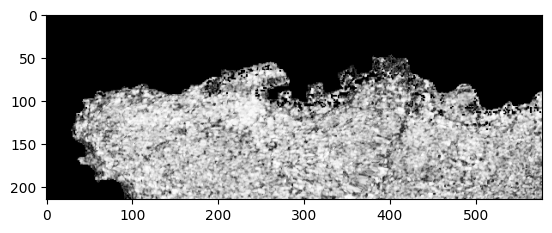

Post-event Coherence map


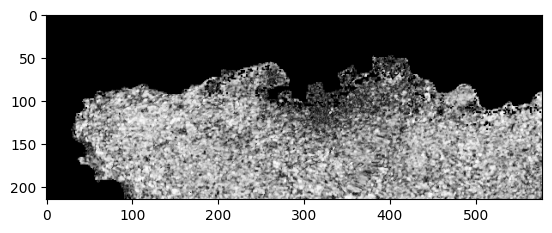

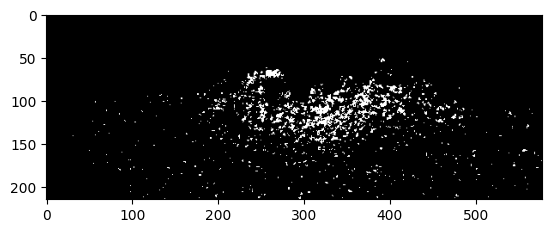

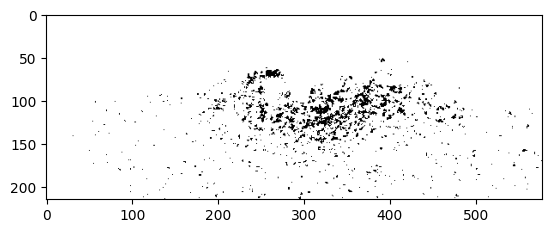


new profile: {'blockxsize': 578,
 'blockysize': 4,
 'count': 3,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
 'driver': 'GTiff',
 'dtype': 'uint8',
 'height': 215,
 'interleave': 'pixel',
 'nodata': 0.0,
 'tiled': False,
 'transform': Affine(0.0001796630568239043, 0.0, 35.46168088013546,
       0.0, -0.0001796630568239043, 33.91835711213407),
 'width': 578}



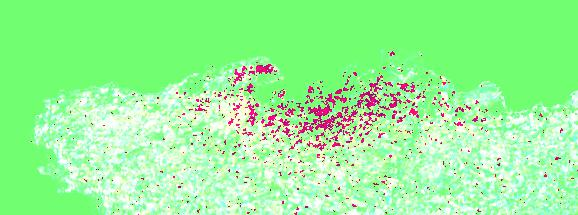

In [ ]:
#@title Computing the Coherence change detection using SNAP outputs
try:
  import rasterio as rio
except:
  !pip install rasterio
  import rasterio as rio
from matplotlib import pyplot
import glob
import os

print('Define a coherence change threshold [0,1] :')
print('Suggested threshold=0.4')
threshold=input()

images=sorted(glob.glob(os.path.join(os.getcwd(),'*tif')))
print(images)
# Reading and plotting pre-event Coherence
print('Pre-event Coherence map')
with rio.open(images[0]) as src:
  coh1=src.read(1)
  pyplot.imshow(src.read(1), cmap='gray')
  pyplot.show()
# Reading and plotting post-event Coherence
print('Post-event Coherence map')
with rio.open(images[1]) as src2:
  transform=src2.transform
  crs=src2.crs
  profile=src2.profile
  coh2=src2.read(1)
  pyplot.imshow(src2.read(1), cmap='gray')
  pyplot.show()


## Composing the RGB image for visual comparison
import numpy as np
channels=np.empty([3,coh1.shape[0],coh1.shape[1]],dtype=np.uint8)
from skimage import  img_as_ubyte
from skimage import exposure

diff=(coh1-coh2)>float(threshold)
pyplot.imshow(diff, cmap='gray')
pyplot.show()

diff=1-diff
pyplot.imshow(diff, cmap='gray')
pyplot.show()

for index,image in enumerate([coh1,diff,coh2]):
    stretched=exposure.equalize_hist(image)
    channels[index,:,:] = img_as_ubyte(stretched)

tif_filename = os.path.join(os.getcwd(),'Coherence_Change_Detection.tif')
num_chans, height, width = channels.shape
with rio.open(tif_filename,'w',driver='GTiff',
                   height=height,width=width,
                   count=num_chans,dtype=channels.dtype,
                   crs=crs,transform=transform, nodata=0.0) as dst:
        dst.write(channels)

import pprint
# Plotting RGB
with rio.open(tif_filename) as infile:
    print(f"\nnew profile: {pprint.pformat(infile.profile)}\n")
    profile=infile.profile
    #
    # change the driver name from GTiff to PNG
    #
    profile['driver']='PNG'
    #
    # pathlib makes it easy to add a new suffix to a
    # filename
    #
    png_filename=tif_filename+'.png'
    raster=infile.read()
    with rio.open(png_filename, 'w', **profile) as dst:
        dst.write(raster)
    #
    # now do jpeg
    #
    profile['driver']='JPEG'
    jpeg_filename=tif_filename.split('.')[0]+'.jpeg'
    with rio.open(jpeg_filename, 'w', **profile) as dst:
        dst.write(raster)

from IPython.display import Image
Image(str(jpeg_filename))

In [ ]:
#@title importing libraries to plot maps
import folium
from folium import plugins
#from scipy.ndimage import imread
import glob

In [ ]:
#@title Defining function to create browse images
# function definition of quicklook generation
from datetime import datetime
import time
from subprocess import Popen,PIPE,STDOUT

def quicklook_gen(image): #,colormap):
    now = datetime.now()
    tmpfolder=os.getcwd()
    cmd=['./snap/bin/pconvert','-b','1',image,'-f','png','-o',tmpfolder]
    print('#########################')
    print('Creating browse image')
    timeStarted = time.time()
    process = Popen(cmd, stdout=PIPE, stderr=STDOUT)
    r = b""
    for line in process.stdout:
        r += line
        print(str(line))
    process.wait()
    timeDelta = time.time() - timeStarted                     # Get execution time.
    print('Finished process in '+str(timeDelta)+' seconds.')
    if process.returncode != 0 :
        message='Error creating browse image'
    else:
        message='Browse image successfully completed.'
        print( message)

In [ ]:
#@title Creating browse images to plot in map
images=glob.glob(os.path.join(os.getcwd(),'2*.tif'))
print(images)
for file in images:
    print('Generating quicklook of file:'+file)
    quicklook_gen(file)#,None)

['/content/20200730_20200805_IW1.tif', '/content/20200730_20200724_IW1.tif']
Generating quicklook of file:/content/20200730_20200805_IW1.tif
#########################
Creating browse image
b'INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters\n'
b'INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP experience.\n'
b'reading file /content/20200730_20200805_IW1.tif\n'
b"creating histogram for band 'band_1'...\n"
b'creating RGB image...\n'
b"writing RGB image to '/content/20200730_20200805_IW1.tif.png'...\n"
Finished process in 9.638845205307007 seconds.
Browse image successfully completed.
Generating quicklook of file:/content/20200730_20200724_IW1.tif
#########################
Creating browse image
b'INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters\n'
b'INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check reg

In [ ]:
#@title Defining mapping visualisation functions
def visualising(images,tag_names):
    file=images[0]
    print(file[:-4])
    src=rio.open(file[:-4])
    BBOX=src.bounds
    print(BBOX)
    ymin=BBOX[1]
    xmin=BBOX[0]
    ymax=BBOX[3]
    xmax=BBOX[2]
    ymean=(ymax+ymin)/2
    xmean=(xmax+xmin)/2

    #m = folium.Map([ymean, xmean], zoom_start=20, tiles='stamenterrain',crs='EPSG3857')
    token = 'pk.eyJ1Ijoiam9zZW1hbnVlbGRlbGdhZG9ibGFzY28iLCJhIjoiY2tjdGxkcGMzMGZqMjJzbnRzN3hzZGFpNSJ9.OAiDxye2w6didAUn2DnJRw'
    # your mapbox token
    tileurl = 'https://api.mapbox.com/v4/mapbox.satellite/{z}/{x}/{y}@2x.png?access_token=' + str(token)

    #m = folium.Map(location=[ymean, xmean], zoom_start=15, tiles=tileurl, attr='Mapbox')
    m = folium.Map(location=[ymean, xmean], zoom_start=13, tiles=None)
    #m = folium.Map((0, 0), tiles=None)
    folium.TileLayer(tileurl, name='myMapbox',attr='Mapbox').add_to(m)

    #m = folium.Map(location=[ymean, xmean], zoom_start=15, tiles=tileurl, attr='Mapbox')
    #merc = os.path.join(file)
    k=0
    for merc in images:
        if not os.path.isfile(merc):
            print(f'Could not find {merc}')
        else:
            img = folium.raster_layers.ImageOverlay(
                name=tag_names[k],
        #        image=band,
                image=merc,
                bounds=[[ymin, xmin], [ymax, xmax]],
                opacity=0.6,
                interactive=True,
                cross_origin=False,
                zindex=1,
            )
            img.add_to(m)
        k=k+1
    #jsonfile='/content/drive/MyDrive/WB_Coherence/Tapovan/Tapovan_Dam.geojson'

    #gjson = folium.GeoJson(jsonfile,name='Tapovan Dam').add_to(m)

    folium.LayerControl().add_to(m)
    m.save(os.path.join(os.getcwd(), 'SNAP_S1_CCD.html'))
    return m

['/content/20200730_20200724_IW1.tif.png', '/content/20200730_20200805_IW1.tif.png', '/content/Coherence_Change_Detection.tif.png']
/content/20200730_20200724_IW1.tif
BoundingBox(left=35.46168088013546, bottom=33.87972955491693, right=35.56552612697968, top=33.91835711213407)



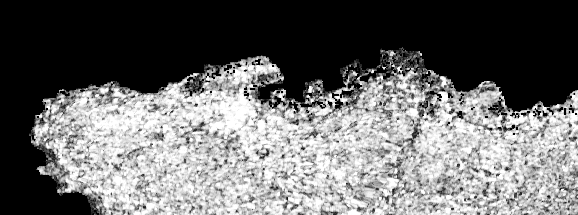
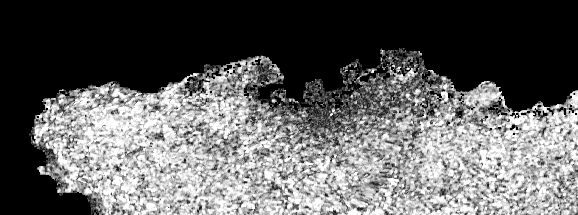
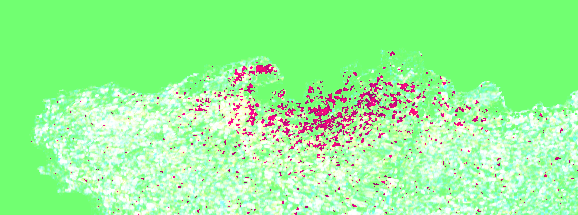

In [ ]:
#@title Visualising outputs in map
import glob
import os
try:
  import rasterio as rio
except:
  !pip install rasterio
  import rasterio as rio
import folium
# Visualising images in the map
#images=sorted(glob.glob(os.path.join(os.getcwd(),'*png')))
images=['/content/20200730_20200724_IW1.tif.png', '/content/20200730_20200805_IW1.tif.png', '/content/Coherence_Change_Detection.tif.png']
print(images)
tags=['Pre-event1','Post-event','Coherence Change']
m=visualising(images,tags)

#import pandas as pd
## Adding point to map
#id = [0]
#name = ['Tapovan dam']
#latitude = ['30.493442']
#longitude = ['79.629040']
#region = ['Uttarakhand (India)']
#df_counters = pd.DataFrame(
#    {'ID' : id,
#     'Name' : name,
#     'latitude' : latitude,
#     'longitude' : longitude,
#     'region' : region
#    })
#df_counters.head()
#locations = df_counters[['latitude', 'longitude']]
#locationlist = locations.values.tolist()
#print(len(locationlist))
#print(locationlist[0])

#folium.Marker([30.493442, 79.629040], popup='Tapovan Dam\n'+'Uttarakhand (India)').add_to(m)

m

In [ ]:
#@title Downloading results (tif,png and html) in local computer
print('Zipping and downloading tif,png and html files')
!rm /content/*zip /content/*sh
from google.colab import files
!zip /content/CCC_colab_results.zip /content/*.tif /content/*.png /content/*.html
files.download('/content/CCC_colab_results.zip')

Zipping and downloading tif,png and html files
  adding: content/20200730_20200724_IW1.tif (deflated 72%)
  adding: content/20200730_20200805_IW1.tif (deflated 72%)
  adding: content/Coherence_Change_Detection.tif (deflated 59%)
  adding: content/20200730_20200724_IW1.tif.png (deflated 0%)
  adding: content/20200730_20200805_IW1.tif.png (deflated 0%)
  adding: content/Coherence_Change_Detection.png (deflated 0%)
  adding: content/Coherence_Change_Detection.tif.png (deflated 0%)
  adding: content/SNAP_S1_CCD.html (deflated 25%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>